
# Project: Investigate a Dataset - TMDB Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are using the TMDB movie database to analyze the data and answer 2 specific questions:
1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues?

We will do targetted data wrangling to be able to answer the 2 questions above. However, the first step would be to load the libraries and read the data.

In [197]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

First question is about popularity of movies based on the genre in different years. We will have to split the values in genres column as there are multiple genres assigned to most movies. Second question is about properties of movies associated with high revenue. For this we need to make sure that we don't have bad data for revenue. 

Loading data from the CSV.



In [218]:
df = pd.read_csv('tmdb-movies.csv')
df.head()
df[df.isna().any(axis=1)].count() # Shows columns which have null values

9018563772

### Question 1
Lets first work on question one related to genres. We need to remove null values from the genres column so that we can use the data without issues. Afterwards, we will have to split the genres so that we don't have multiple genres clubbed into each row. While this is done, we will end up getting a new dataframe created with required data in it. This dataframe will be used to answer the question about genres and popularities of movies year over year.

In [199]:
# Remove columns with null values for genres
df_gennonull = df[df['genres'].notnull()]
# Find out maximum number of genres assigned to any movie in the list
genre_max = df_gennonull['genres'].str.count('\|').max()
# create new dataframe which will contain list of movies with one genre assigned to them
new_df = pd.DataFrame(columns=df_gennonull.columns)
# splitting the genres column and append dataframes to get new_df populated
for i in range(0,genre_max-1):
    df_splitting = df_gennonull.copy()
    df_splitting['genres'] = df_splitting['genres'].apply(lambda x : x.split('|')[i] if len(x.split('|'))>i else 'NaN')
    new_df = new_df.append(df_splitting[df_splitting['genres']!= 'NaN'],ignore_index=True)

new_df['revenue'] = new_df['revenue'].astype('int') # converting revenue to numeric field
new_df['budget'] = new_df['budget'].astype('int') # converting budget to numeric field
#new_df.dtypes

We will start analyzing the data for any outliers. The question is related to popularity, so we will check popularity data.

In [200]:
# Analyzing popularity data
print("Mean of Popularity : {}".format(new_df['popularity'].mean()))
print("Median of Popularity : {}".format(new_df['popularity'].median()))
print("Standard Deviation of Popularity : {}".format(new_df['popularity'].std()))
print("Max Popularity : {}".format(new_df['popularity'].max()))
print("Min Popularity : {}".format(new_df['popularity'].min()))
#new_df.hist(figsize=(8,8))
new_df[new_df['popularity']>10].count() # Only 31 movies have popularity above 10, there could be issues with the data
new_df[new_df['popularity']<1].count() # 20098 movies have popularity data below 1, there could be issues with the data


Mean of Popularity : 0.6956612565781416
Median of Popularity : 0.406511
Standard Deviation of Popularity : 1.0919699185865666
Max Popularity : 32.985763
Min Popularity : 6.500000000000001e-05


id                      20098
imdb_id                 20080
popularity              20098
budget                  20098
revenue                 20098
original_title          20098
cast                    19978
homepage                 4407
director                20015
tagline                 14405
keywords                17098
overview                20093
runtime                 20098
genres                  20098
production_companies    18066
release_date            20098
vote_count              20098
vote_average            20098
release_year            20098
budget_adj              20098
revenue_adj             20098
dtype: int64

We aren't sure of the way popularity data is compiled, so we are assuming that the data is clean and doesn't have any wrong entires in it.

We will work on new_df further in Exploratory Data Analysis section.

### Question 2
Let's work on the 2nd question, and find out properties associated with high revenue movies. We will have to remove the movies from the data set which revenue is set to 0.

In [201]:
df[df['revenue']==0].count()
df_nonzerorev = df[df['revenue']!=0]
#df_nonzerorev

We can define the high revenue movies which have revenue more than the mean revenue.

In [202]:
df_highrev = df_nonzerorev[df_nonzerorev['revenue']>df_nonzerorev['revenue'].mean()]


In [203]:
# To compare various statistics of high revenue and low revenue movies 
# (by adding a Yes or No column for high revenue and enable use groupby functions)
df_check = df_nonzerorev.copy()
df_check['high_rev'] = df_check['revenue'].apply(lambda x : 'YES' if x>df_check['revenue'].mean() else 'NO')

Now, we have high revenue movies in a seperate data frame. 
We can now find out properties associated with high revenue movies e.g. mean budget, mean revenue, associated genres, mean popularity, vote average etc. Further analysis on this will be done in Exploratory Data Analysis section below.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will be calculating various statitics related to movies in the TMDB database and also plot various charts to understand the data better and arrive at some conclusions.

We will use charts to visualize the data and for this purpose we have functions which are defined below

In [204]:
def chartIt(titleVal, xlabelVal, ylabelVal, data, kindVal, stackedVal):
    plt.title(titleVal)
    plt.xlabel(xlabelVal)
    plt.ylabel(ylabelVal);
    data.plot(kind=kindVal,stacked=stackedVal, figsize=(25,15));
    
def chartIt2(titleVal,xlabelVal,ylabelVal,data):
    fig, axes = plt.subplots(figsize=(25, 15))
    plt.title(titleVal)
    plt.xlabel(xlabelVal)
    plt.ylabel(ylabelVal)
    plt.figure()
    data.unstack().plot(ax=axes);

### Question 1

For question 1 we have already prepared our data in new_df. Hence, we will be using it to continue our exploration of the movie database.

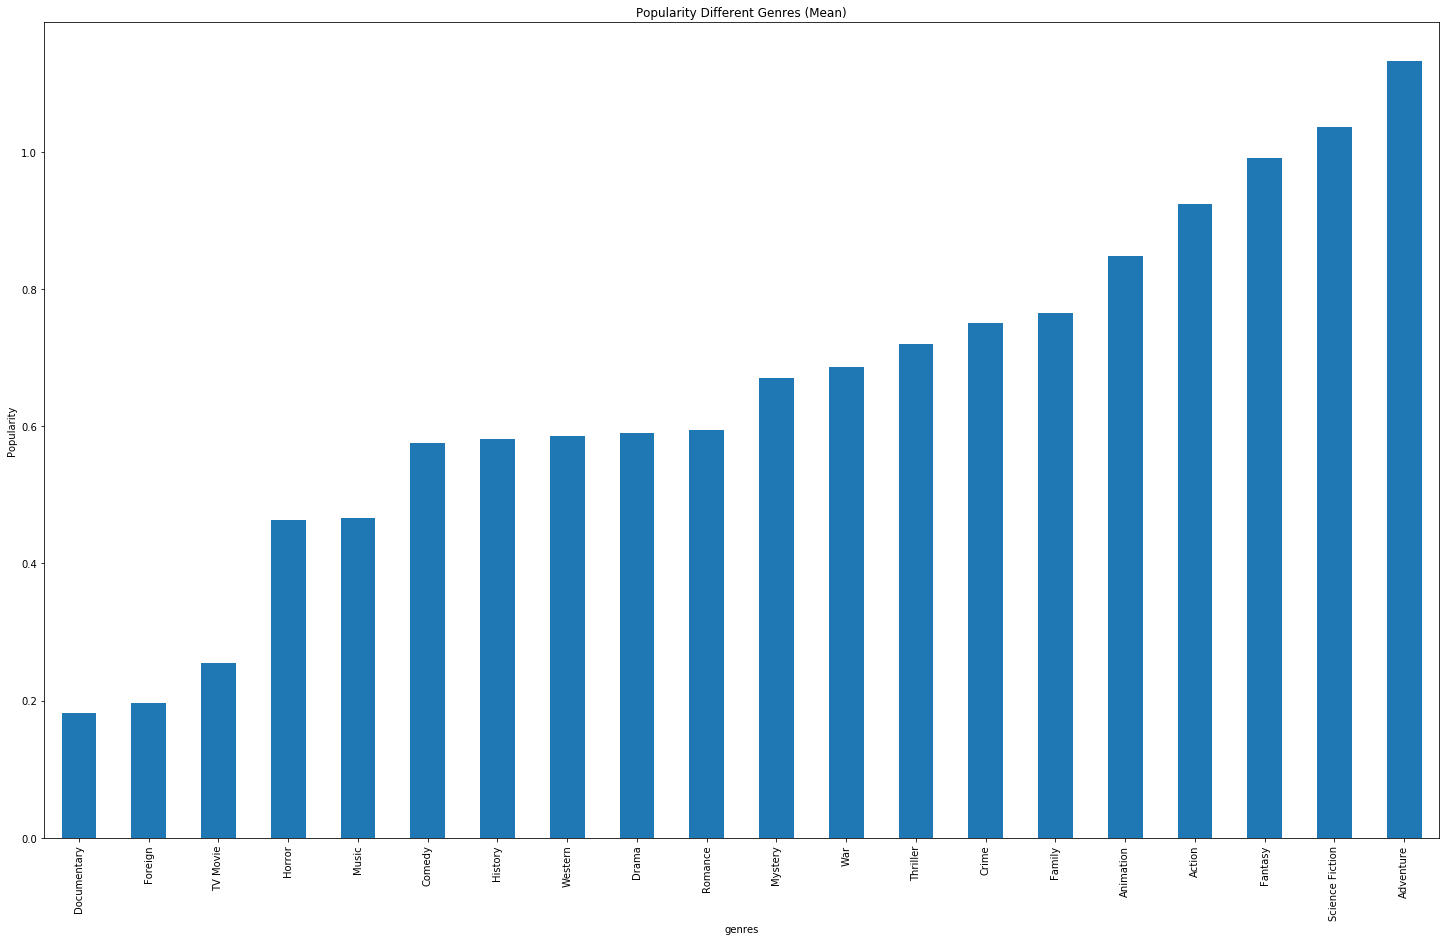

In [205]:
# Which Genres are most popular?
p0 = new_df.groupby('genres')['popularity'].mean().sort_values()
chartIt('Popularity Different Genres (Mean)', 'Genres','Popularity',p0,'bar',True)


Chart above shows various genres and their popularity and we can easily spot the top genres by popularity.

In [206]:
# Which movie of which genres have highest number of directors?
new_df.groupby('genres')['director'].count().sort_values()

genres
TV Movie            121
Western             123
Foreign             139
War                 207
History             289
Music               356
Documentary         507
Mystery             652
Animation           683
Fantasy             763
Science Fiction     940
Family              986
Crime              1180
Adventure          1390
Romance            1469
Horror             1589
Action             2327
Thriller           2335
Comedy             3686
Drama              4612
Name: director, dtype: int64

The output above shows that Drama, Comedy and Thriller are very populart among directors.

In [207]:
# Directors with highest number of movies and their genres
print(new_df.groupby(['director','genres'])['id'].count().sort_values().tail(20))


director           genres 
Oliver Stone       Drama      14
Ron Howard         Drama      14
Garry Marshall     Comedy     14
Tyler Perry        Drama      14
Blake Edwards      Comedy     14
Gus Van Sant       Drama      14
John Landis        Comedy     15
Spike Lee          Drama      15
Steven Spielberg   Drama      15
Sidney Lumet       Drama      15
Mike Nichols       Drama      16
Stephen Frears     Drama      17
Steven Soderbergh  Drama      17
Ridley Scott       Drama      17
Wes Craven         Horror     18
Woody Allen        Romance    18
Martin Scorsese    Drama      23
Woody Allen        Drama      24
Clint Eastwood     Drama      26
Woody Allen        Comedy     38
Name: id, dtype: int64


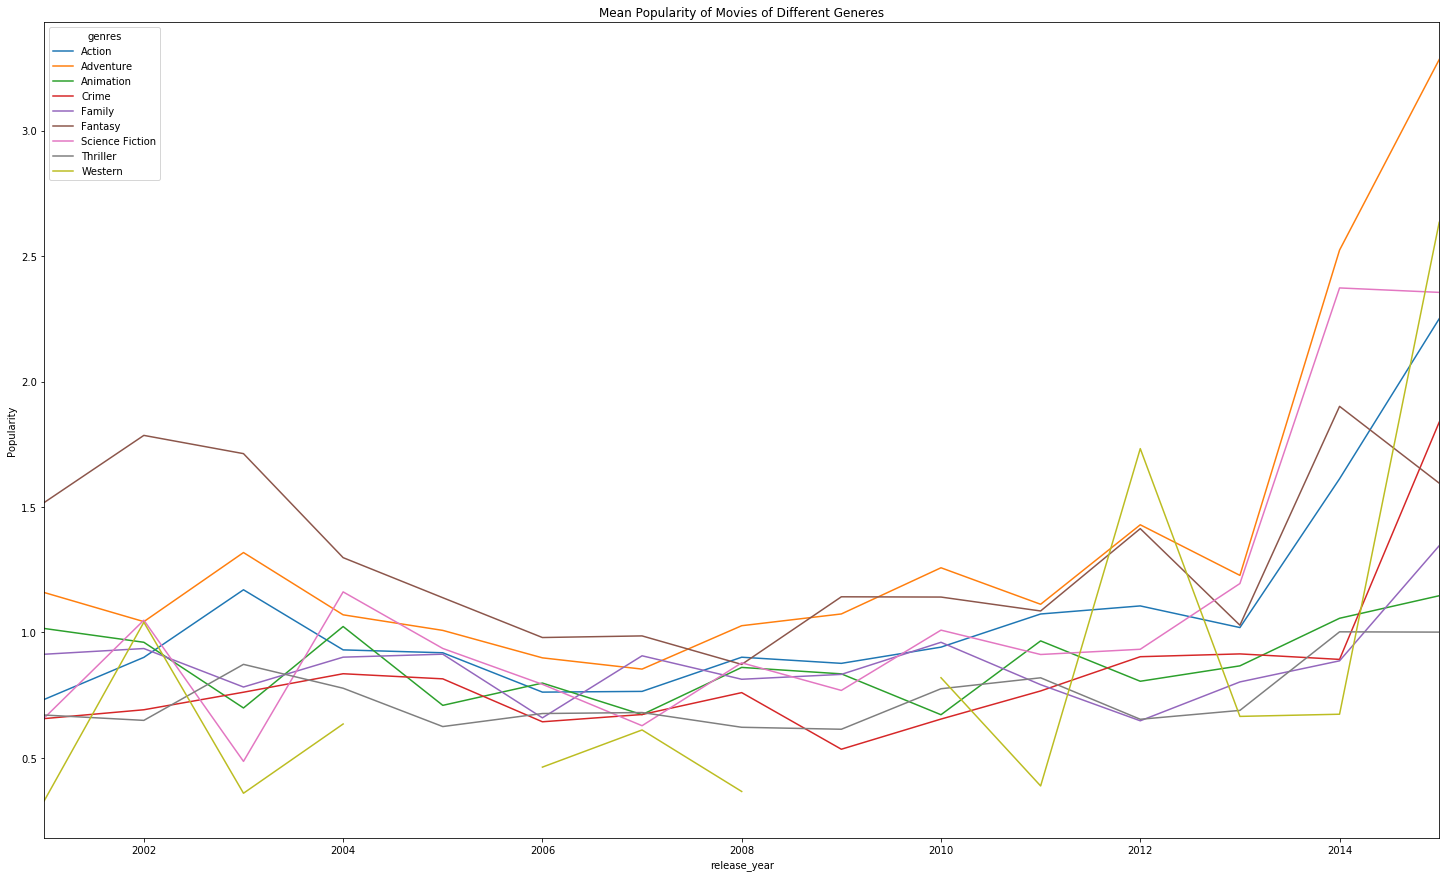

<Figure size 432x288 with 0 Axes>

In [208]:
# Plotting mean populariry of various genres year over year after year 2000
new_df['release_year']= new_df['release_year'].astype(int)
#p1 = new_df.query('release_year>2000').groupby(['release_year','genres'])['popularity'].mean()
p1 = new_df.query('release_year>2000 and genres == ["Adventure","Fantasy","Science Fiction","Action","Western","Animation","Family","Crime","Thriller"]').groupby(['release_year','genres'])['popularity'].mean()

chartIt2('Mean Popularity of Movies of Different Generes','Year','Popularity',p1)

This chart above shows that Adventure movies have gradually risen in popularity and have taken number 1 position by going above Fantasy. In the early 2000s, Fantasy used to be the top genre. It also shows the increase in popularity of Science Fiction movies from 2012 onwards.

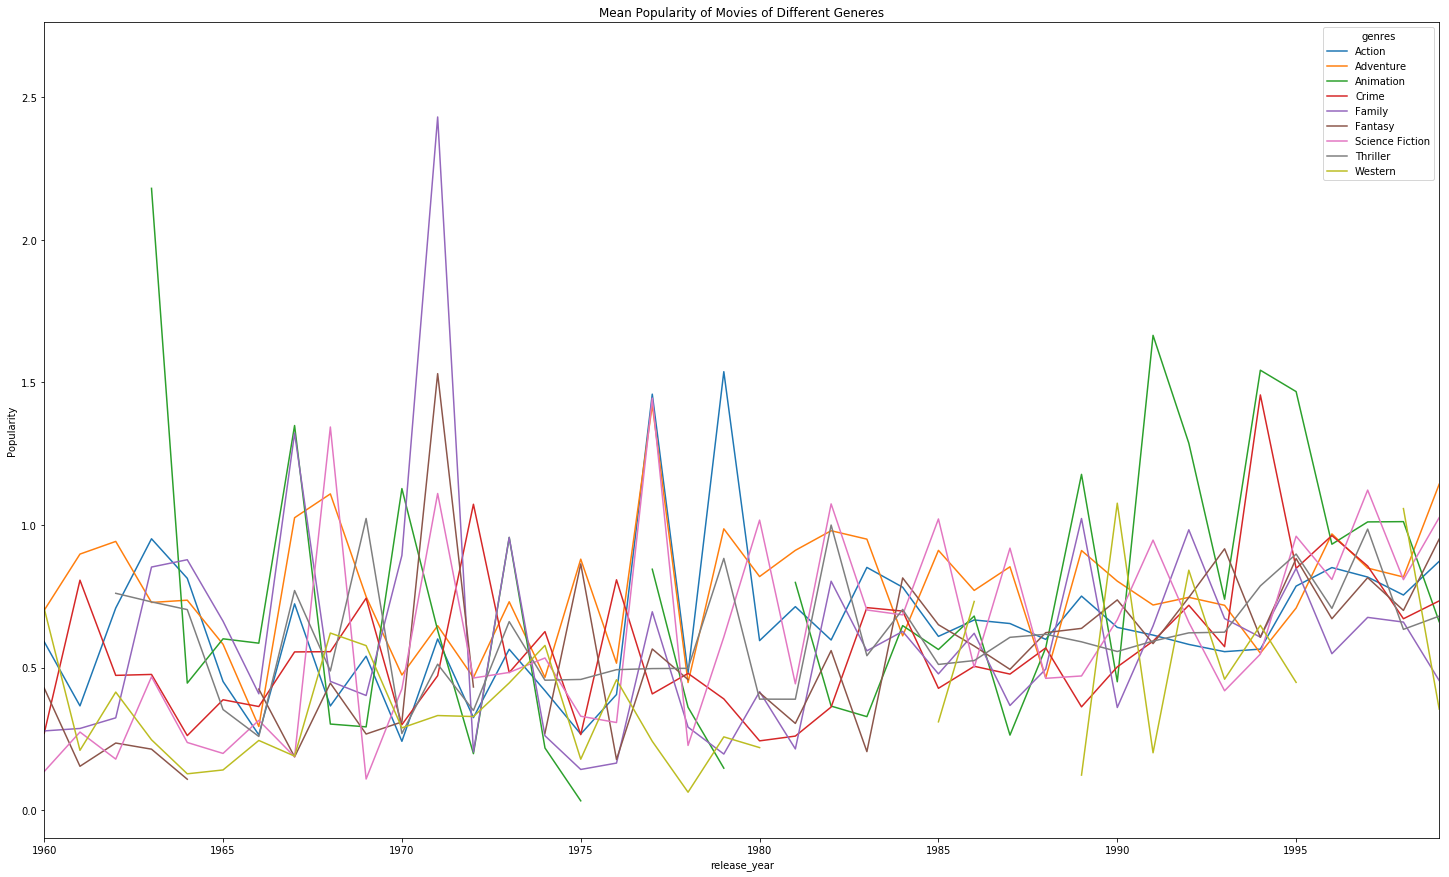

<Figure size 432x288 with 0 Axes>

In [209]:
# Plotting mean populariry of various genres year over year before year 2000
#p1 = new_df.query('release_year<2000').groupby(['release_year','genres'])['popularity'].mean()
p1 = new_df.query('release_year<2000 and genres == ["Adventure","Fantasy","Science Fiction","Action","Western","Animation","Family","Crime","Thriller"]').groupby(['release_year','genres'])['popularity'].mean()
chartIt2('Mean Popularity of Movies of Different Generes','Year','Popularity',p1)

The chart above shows that popularity of various genres fluctuate significantly over the years. During 1990s there was an up surge in popularity of Animation movies.

### Question 2
We will explore the data to find out what properties are associated with high revenue movies. We already have df_highrev and df_check prepared for these purposes. We also have new_df which can be used for exploring data further.

In [210]:
# Calculating various statistics for high revenue movies
genre = np.array([])
for i1 in df_highrev['genres']:
    genre = np.append(genre,list(i1.split('|')))
    
print("Genres associated with high revenue movies are: {}".format(np.unique(genre)))

print("Mean budget for high revenue movies is: {}".format(df_highrev['budget'].mean()))
print("Mean revenue for high revenue movies is: {}".format(df_highrev['revenue'].mean()))

print("Mean popularity for high revenue movies is: {}".format(df_highrev['popularity'].mean()))
print("Mean vote average for high revenue movies is: {}".format(df_highrev['vote_average'].mean()))

prod_comp = np.array([])

for j in df_highrev['production_companies']:
    prod_comp = np.append(prod_comp,list(j.split('|')))
print("Production Companies making high revenue movies are: {}".format(np.unique(prod_comp)))


Genres associated with high revenue movies are: ['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Mystery' 'Romance'
 'Science Fiction' 'Thriller' 'War' 'Western']
Mean budget for high revenue movies is: 67714658.97364458
Mean revenue for high revenue movies is: 261889502.18298194
Mean popularity for high revenue movies is: 2.0381965067771066
Mean vote average for high revenue movies is: 6.36468373493976
Production Companies making high revenue movies are: ['11:11 Mediaworks' '1492 Pictures' '20th Century Fox' ...
 'Zucker/Netter Productions' 'platinum studios' 'uFilm']


Above code provides various statistics about high revenue movies.

director
Ridley Scott         3649996480
Tim Burton           3665414624
Chris Columbus       3851491668
Robert Zemeckis      3869690869
David Yates          4154295625
Christopher Nolan    4167548502
Michael Bay          4917208171
James Cameron        5841894863
Peter Jackson        6523244659
Steven Spielberg     9018563772
Name: revenue, dtype: int64


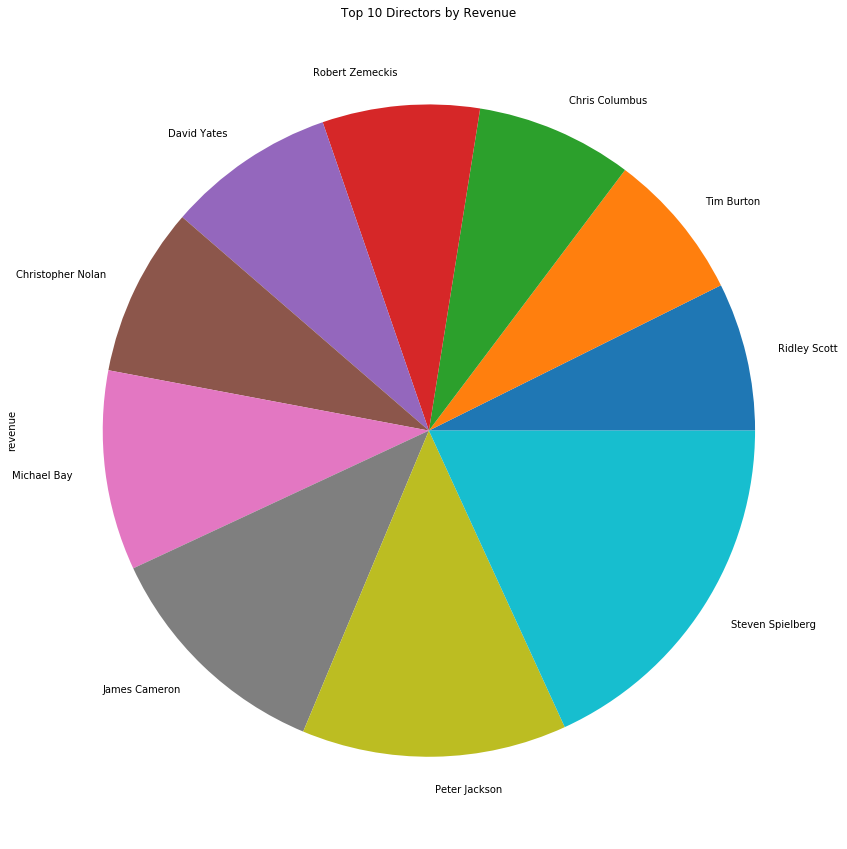

In [211]:
# Top 10 directors with highest revenue
df_nonulldir = df_check[df_check['director'].notnull()][['director','revenue']]
df_nonulldir.drop_duplicates(inplace=True)
print(df_nonulldir.groupby(['director'])['revenue'].sum().sort_values().tail(10))
# Plotting a pie chart for top 10 directots with highest revenue
p0 = df_check.groupby(['director'])['revenue'].sum().sort_values().tail(10)
chartIt('Top 10 Directors by Revenue','','',p0,'pie',False)

The chart above shows that Steven Spielberg, Peter Jackson and James Cameron are the top 3 directors in terms of revenues from their movies.

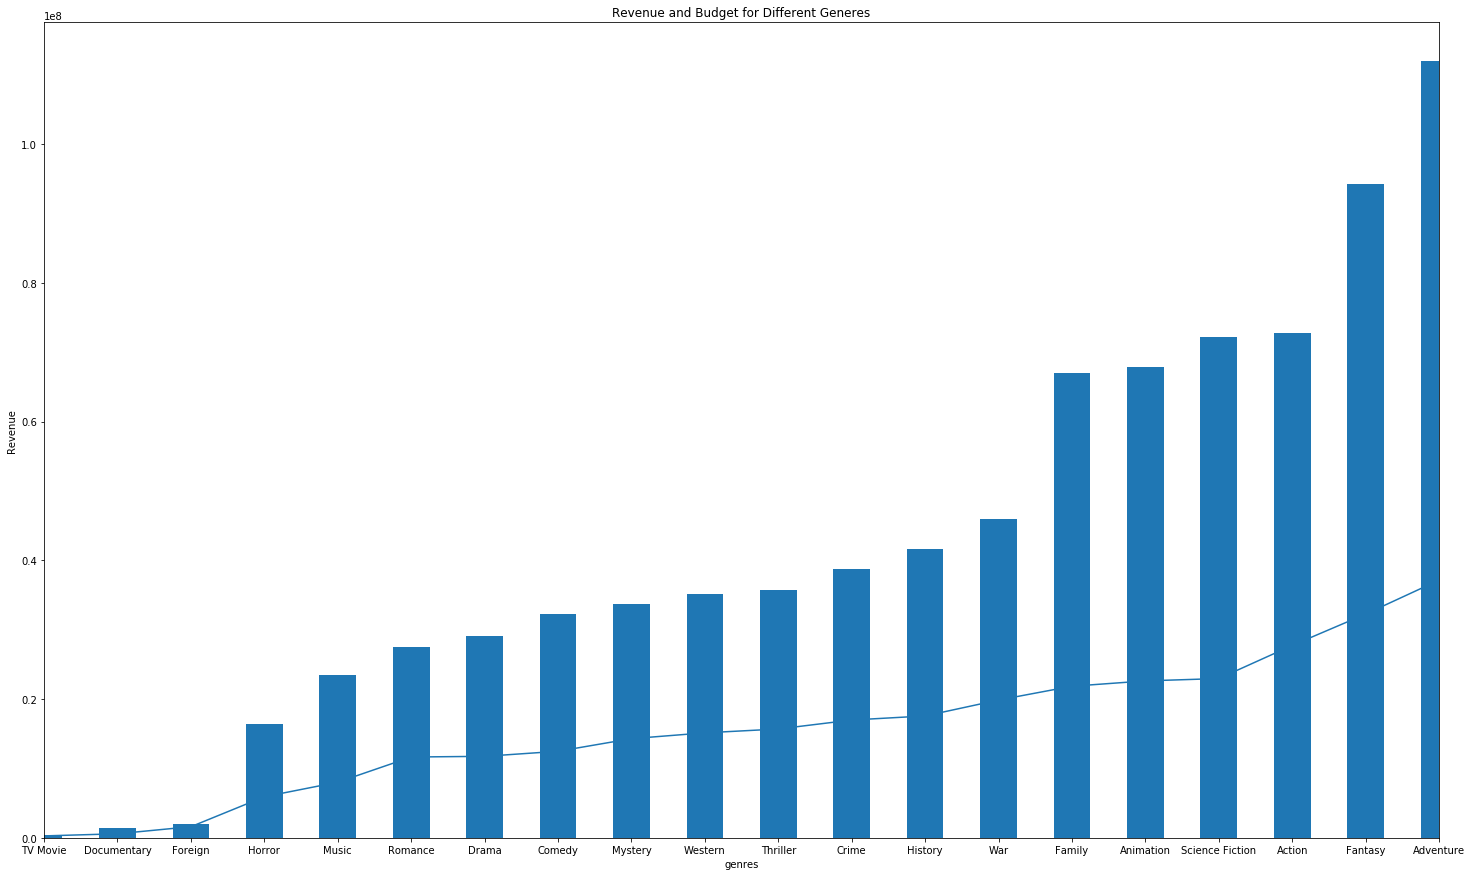

In [212]:
p0 = new_df.groupby('genres')['revenue'].mean().sort_values()
p1 = new_df.groupby('genres')['budget'].mean().sort_values()
chartIt('Revenue and Budget for Different Generes','Genres','Revenue',p0,'bar',True)
chartIt('Revenue and Budget for Different Generes','Genres','Revenue',p1,'line',True)


We can see the genres with top revenue and budget in the chart above. It also shows that high revenue movies usually have high budget as well. On an average, movies are able to make more than 2 times their budget as their revenue. Revenue vs budget ratio is much higher fgor Family, Animation, Science Fiction, Action, Fantasy and Adventure movies.

In [213]:
# Using group by functions we are compare how do various stats compare for high revenue movies vs low revenue movies

# Mean popularity for high revenue movies vs low revenue movies
print('Popularity\n'+str(df_check.groupby('high_rev')['popularity'].mean())) 
# Mean revenue for high revenue movies vs low revenue movies
print('Revenue\n'+str(df_check.groupby('high_rev')['revenue'].mean())) 
# Mean budget for high revenue movies vs low revenue movies
print('Budget\n'+str(df_check.groupby('high_rev')['budget'].mean())) 
# Mean vote average for high revenue movies vs low revenue movies
print('Vote Average\n'+str(df_check.groupby('high_rev')['vote_average'].mean())) 

Popularity
high_rev
NO     0.670657
YES    2.038197
Name: popularity, dtype: float64
Revenue
high_rev
NO     2.411440e+07
YES    2.618895e+08
Name: revenue, dtype: float64
Budget
high_rev
NO     1.518682e+07
YES    6.771466e+07
Name: budget, dtype: float64
Vote Average
high_rev
NO     6.067348
YES    6.364684
Name: vote_average, dtype: float64


Budget of high revenue movies is significantly higher on an average and their popularity ratings are also higher.

                                    original_title     revenue
1386                                        Avatar  2781505847
3                     Star Wars: The Force Awakens  2068178225
5231                                       Titanic  1845034188
4361                                  The Avengers  1519557910
0                                   Jurassic World  1513528810
4                                        Furious 7  1506249360
14                         Avengers: Age of Ultron  1405035767
3374  Harry Potter and the Deathly Hallows: Part 2  1327817822
5422                                        Frozen  1274219009
5425                                    Iron Man 3  1215439994


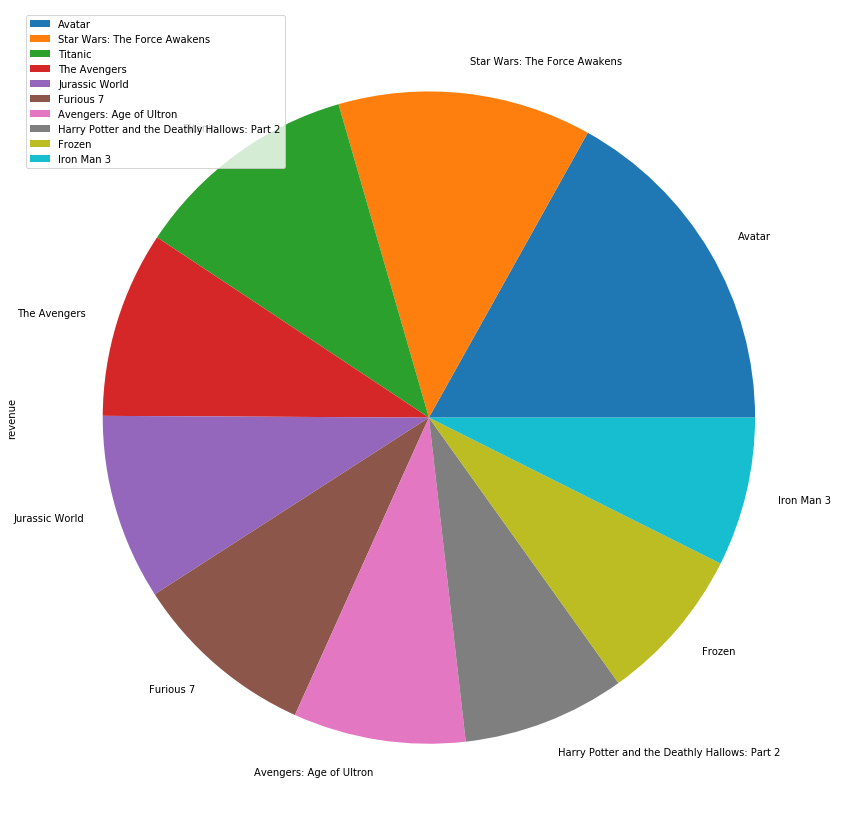

In [214]:
# Finding the top 10 highest revenue movies and plotting a pie chart
p0 = df_check[['original_title','revenue']].sort_values(by=['revenue'], ascending=False).head(10)
print(p0)
p0.plot( y='revenue', kind='pie', labels=p0['original_title'], figsize=(25,15));

Avatar, Starwars and Titanic are top 3 highest earning movies.

<a id='conclusions'></a>
## Conclusions

Based on the data analysis done for the above 2 question following conclusions can be drawn.

1. Adventure, Science Fiction, Fantasy, Action and Animation are the top 5 genres in term of popularity
2. Before year 2000, the data shows that popularity of various genres fluctuated a lot more year over year, while after year 2000, we have the genres mentioned in point 1 above as more popular in general.
3. There are more directors making Drama, Comedy, Thriller and Action than other genres
4. Steven Spielberg movies have made more revenue than any other director
5. Adventure, Fantasy, Animation, Action and Family genres are the top 5 in terms of revenue
6. High revenue movies are significantly high revenue and high budget compared to low revenue movies
7. High revenue movies are more than 3 times popular than low revenue movies
8. Avatar,  Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World are the top 5 highest revenue movies

Limitation with the results:
1. There are more than 6000 movies in the data set for which revenue is 0. This can skew the results to a great degree. If the data was available for them, the results could have been different. Since the number of such entries are very high (more than 50% of the data), using imputed values may not be appropriate. 
2. Most of the movies are assigned multiple genres. The results related to genres can be greatly impacted by a few very popular or high revenue movies which have multiple genres assigned, as they can move the mean values up by significant margin for multiple genres (e.g. a single very popular movies impacting the popularity of multiple genres).
3. Popularity values range between 6.500000000000001e-05 and 32.985763. That is a big range and some movies having microscopic values for popularity, raises concern about the data quality. More than 20000 movies have popularity values below 1 and only 31 movies have values above 10. We can possibly remove some data which has unrealistic values, however due lack of understanding of the computation basis for popularity, we are assuming the data is correct.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [215]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0